# Arrays of numbers & Data Fitting
In this notebook we look at how to create / read in an array of numbers, fit the data to a polynomial or any arbitrary function.

## ndarray from numpy

In [1]:
import numpy as np

For any function you want to know more, place a question mark after the name and shift-enter to see a pop-up showing help about that function.

In [2]:
np.arange?

Change the argument to the function arange from float (3.0) to int (3) and see the output array and its datatype.

In [3]:
a = np.arange(3.0)
type(a)

numpy.ndarray

In [4]:
a.dtype

dtype('float64')

In [5]:
a

array([0., 1., 2.])

You can inspect the datatypes available in numpy.

In [6]:
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [7]:
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [8]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [9]:
np.iinfo(np.int64)

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

You can instruct which datatype to be used to create the array.

In [10]:
a1 = np.arange(10, dtype='f')

In [11]:
a1

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [12]:
a2 = np.arange(10, dtype='i')

In [13]:
a2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

### Shape of array

In [14]:
a1.shape

(10,)

In [15]:
a2 = a1.reshape(5,2)

In [16]:
a2

array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.],
       [8., 9.]], dtype=float32)

In [17]:
a2.shape

(5, 2)

In [18]:
a3 = a2.ravel()
print(a3)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [19]:
a4 = a2.flatten()
print(a4)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [20]:
a2.transpose()

array([[0., 2., 4., 6., 8.],
       [1., 3., 5., 7., 9.]], dtype=float32)

### Reading array from a local file

Check the working directory of the notebook to ensure the filename is relative to the path.

In [21]:
%pwd

'/ehome/gphani/Programs/JupyterNotebooks/Python'

We assume that there is a file "expdata.csv" in the above path with two columns of data.

In [22]:
d1 = np.genfromtxt('expdata.csv', delimiter=',', usecols=(0,1), skip_header=1)

In [23]:
d1

array([[ 1.  ,  1.  ],
       [ 2.  ,  3.89],
       [ 3.  ,  9.05],
       [ 4.  , 15.87],
       [ 5.  , 25.08]])

In [24]:
%matplotlib inline

In [25]:
import matplotlib.pyplot as plt

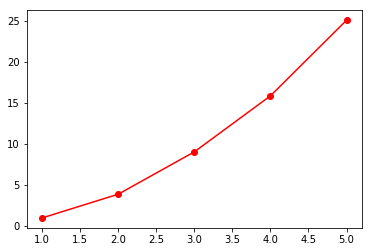

In [26]:
plt.plot(d1[:,0], d1[:,1], 'ro-')

### Fitting the data to a polynomial

In [27]:
poly = np.polyfit(d1[:,0], d1[:,1], 1)

In [28]:
poly

array([ 6.014, -7.064])

In [29]:
np.polyval(poly, 3.0)

10.978

In [30]:
yf = np.polyval(poly, d1[:,0])

In [31]:
yf

array([-1.05 ,  4.964, 10.978, 16.992, 23.006])

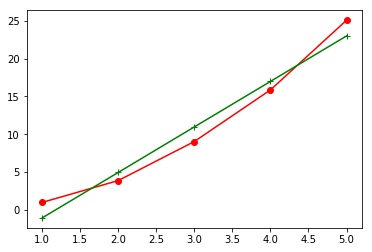

In [32]:
plt.plot(d1[:,0], d1[:,1], 'ro-')
plt.plot(d1[:,0], yf, 'g+-')

## Fitting data to any function using scipy

We create a data that is a bit noisy but otherwise sinusoidal in appearance. We then use the optimize sub-package under scipy to fit the user defined function to the data.

In [33]:
np.random.seed(0)

In [34]:
x_data = np.linspace(-5, 5, num=50)

In [35]:
import math as math

Here is a reminder that you cannot use functions in the math module to pass an array in. 

In [36]:
y_data = math.sin(x_data)

TypeError: only size-1 arrays can be converted to Python scalars

You can do that using the same functions in numpy module. 

In [37]:
y_data = 2.9*np.sin(1.5*x_data) + np.random.normal(size=50)

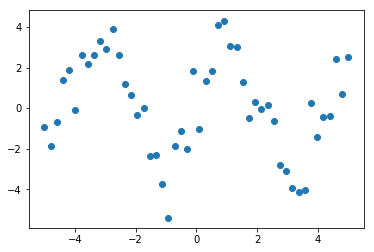

In [38]:
plt.scatter(x_data, y_data)
plt.show()

In [39]:
from scipy import optimize

In [40]:
def test_func(x,a,b):
    return a*np.sin(b*x)

In [41]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])

In [42]:
print(params)

[3.05931973 1.45754553]


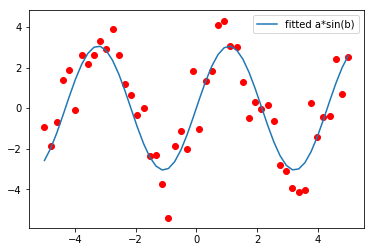

In [43]:
plt.scatter(x_data, y_data, c='r')
plt.plot(x_data,test_func(x_data,params[0], params[1]), label='fitted a*sin(b)')
plt.legend(loc='best')
plt.show()